<div style="display: flex; background-color: RGB(255, 255, 240);" >
<h1 style="margin: auto; padding: 30px; ">NETTOYAGE DES DONNEES DE LA POULE QUI CHANTE </h1>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [434]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [539]:
import pandas as pd
import unidecode
import re
import pycountry
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargement des fichiers</h3>
</div>

In [437]:
# Chemins des fichiers
dispo_file = r"C:\Users\elodi\Desktop\Projet 12\DATA\Dispo_alimentaire.csv"
imp_exp_file = r"C:\Users\elodi\Desktop\Projet 12\DATA\Importations_exportations.csv"
pop_file = r"C:\Users\elodi\Desktop\Projet 12\DATA\Population.csv"
production_file = r"C:\Users\elodi\Desktop\Projet 12\DATA\Production.csv"
inflation_file = r"C:\Users\elodi\Desktop\Projet 12\DATA\Inflation.csv"
pib_file = r"C:\Users\elodi\Desktop\Projet 12\DATA\Pib.csv"
stabilite_politique_file = r"C:\Users\elodi\Desktop\Projet 12\DATA\Stabilité_politique.csv" 

# Lecture des fichiers CSV
df_dispo = pd.read_csv(dispo_file, encoding="utf-8")
df_imp_exp = pd.read_csv(imp_exp_file)
df_pop = pd.read_csv(pop_file)
df_production = pd.read_csv(production_file)
df_inflation = pd.read_csv(inflation_file)
df_pib = pd.read_csv(pib_file)
df_stabilite_politique = pd.read_csv(stabilite_politique_file)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.3 - Analyse exploratoire des fichiers</h3>
</div>

In [439]:
#Afficher les dimensions des datasets
print("Le tableau disponibilite_alimentaire comporte {} observation(s) ou article(s)".format(df_dispo.shape[0]))
print("Le tableau disponibilite_alimentaire comporte {} colonne(s)".format(df_dispo.shape[1]))
print("Le tableau importations_exportations comporte {} observation(s) ou article(s)".format(df_imp_exp.shape[0]))
print("Le tableau importations_exportations comporte {} colonne(s)".format(df_imp_exp.shape[1]))
print("Le tableau population comporte {} observation(s) ou article(s)".format(df_pop.shape[0]))
print("Le tableau population comporte {} colonne(s)".format(df_pop.shape[1]))
print("Le tableau production comporte {} observation(s) ou article(s)".format(df_production.shape[0]))
print("Le tableau production comporte {} colonne(s)".format(df_production.shape[1]))
print("Le tableau inflation comporte {} observation(s) ou article(s)".format(df_inflation.shape[0]))
print("Le tableau inflation comporte {} colonne(s)".format(df_inflation.shape[1]))
print("Le tableau pib comporte {} observation(s) ou article(s)".format(df_pib.shape[0]))
print("Le tableau pib comporte {} colonne(s)".format(df_pib.shape[1]))
print("Le tableau stabilite politique comporte {} observation(s) ou article(s)".format(df_stabilite_politique.shape[0]))
print("Le tableau stabilite politique comporte {} colonne(s)".format(df_stabilite_politique.shape[1]))

Le tableau disponibilite_alimentaire comporte 378 observation(s) ou article(s)
Le tableau disponibilite_alimentaire comporte 15 colonne(s)
Le tableau importations_exportations comporte 282 observation(s) ou article(s)
Le tableau importations_exportations comporte 15 colonne(s)
Le tableau population comporte 702 observation(s) ou article(s)
Le tableau population comporte 15 colonne(s)
Le tableau production comporte 195 observation(s) ou article(s)
Le tableau production comporte 15 colonne(s)
Le tableau inflation comporte 197 observation(s) ou article(s)
Le tableau inflation comporte 17 colonne(s)
Le tableau pib comporte 190 observation(s) ou article(s)
Le tableau pib comporte 15 colonne(s)
Le tableau stabilite politique comporte 196 observation(s) ou article(s)
Le tableau stabilite politique comporte 15 colonne(s)


In [440]:
# Vérifier les colonnes
print(df_dispo.columns)
print(df_imp_exp.columns)
print(df_pop.columns)
print(df_production.columns)
print(df_inflation.columns)
print(df_pib.columns)
print(df_stabilite_politique.columns)

Index(['Code Domaine', 'Domaine', 'Code zone (M49)', 'Zone', 'Code Élément',
       'Élément', 'Code Produit (FBS)', 'Produit', 'Code année', 'Année',
       'Unité', 'Valeur', 'Symbole', 'Description du Symbole', 'Note'],
      dtype='object')
Index(['Code Domaine', 'Domaine', 'Code zone (M49)', 'Zone', 'Code Élément',
       'Élément', 'Code Produit (CPC)', 'Produit', 'Code année', 'Année',
       'Unité', 'Valeur', 'Symbole', 'Description du Symbole', 'Note'],
      dtype='object')
Index(['Code Domaine', 'Domaine', 'Code zone (M49)', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole', 'Note'],
      dtype='object')
Index(['Code Domaine', 'Domaine', 'Code zone (M49)', 'Zone', 'Code Élément',
       'Élément', 'Code Produit (CPC)', 'Produit', 'Code année', 'Année',
       'Unité', 'Valeur', 'Symbole', 'Description du Symbole', 'Note'],
      dtype='object')
Index(['Code Domaine', 'Do

In [441]:
df_pop['Valeur'] = pd.to_numeric(df_pop['Valeur'], errors='coerce')
#Nettoyage colonnes inutiles
df_pop = df_pop.drop(columns=['Unité', 'Symbole', 'Description du Symbole', 'Note'])
# Multiplier par 1000 pour passer de milliers à individus
df_pop['Valeur'] = df_pop['Valeur'] * 1000

In [442]:
df_pop_pivot = df_pop.pivot(index='Zone', columns='Élément', values='Valeur').reset_index()
# colonnes résultantes : ['Zone', 'Population totale', 'Population rurale', 'Population urbaine']


In [443]:
df_pop_pivot.head (5)

Élément,Zone,Population rurale,Population totale,Population urbaine
0,Afghanistan,29191512.0,40578842.0,10587583.0
1,Afrique du Sud,18997635.0,62378410.0,40998414.0
2,Albanie,1066667.0,2827608.0,1879873.0
3,Algérie,11247753.0,45477389.0,33336714.0
4,Allemagne,18460833.0,84086227.0,64130933.0


In [444]:
# Multiplier par 1000 pour passer de milliers à unités
df_imp_exp['Valeur'] = df_imp_exp['Valeur'] * 1000

In [445]:
df_imp_exp.head(5)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,TCL,Cultures et produits animaux,4,Afghanistan,5609,Importations - quantité,2151,Poulets,2022,2022,1000 têtes,11927000,X,Chiffre de sources internationales,Données estimées en utilisant les données des ...
1,TCL,Cultures et produits animaux,710,Afrique du Sud,5609,Importations - quantité,2151,Poulets,2022,2022,1000 têtes,294000,A,Chiffre officiel,NaN
2,TCL,Cultures et produits animaux,710,Afrique du Sud,5909,Exportations - quantité,2151,Poulets,2022,2022,1000 têtes,5722000,A,Chiffre officiel,NaN
3,TCL,Cultures et produits animaux,8,Albanie,5609,Importations - quantité,2151,Poulets,2022,2022,1000 têtes,8743000,X,Chiffre de sources internationales,Données estimées en utilisant les données des ...
4,TCL,Cultures et produits animaux,12,Algérie,5609,Importations - quantité,2151,Poulets,2022,2022,1000 têtes,4619000,X,Chiffre de sources internationales,Données estimées en utilisant les données des ...


In [446]:
df_dispo.head(5)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (FBS),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FBS,Bilans Alimentaires (2010-),4,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,S2734,Viande de Volailles,2022,2022,kcal/personne,0.87,E,Valeur estimée,NaN
1,FBS,Bilans Alimentaires (2010-),4,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),S2734,Viande de Volailles,2022,2022,kcal/personne/jour,3.29,E,Valeur estimée,NaN
2,FBS,Bilans Alimentaires (2010-),710,Afrique du Sud,645,Disponibilité alimentaire en quantité (kg/pers...,S2734,Viande de Volailles,2022,2022,kcal/personne,39.57,E,Valeur estimée,NaN
3,FBS,Bilans Alimentaires (2010-),710,Afrique du Sud,664,Disponibilité alimentaire (Kcal/personne/jour),S2734,Viande de Volailles,2022,2022,kcal/personne/jour,149.24,E,Valeur estimée,NaN
4,FBS,Bilans Alimentaires (2010-),8,Albanie,645,Disponibilité alimentaire en quantité (kg/pers...,S2734,Viande de Volailles,2022,2022,kcal/personne,22.56,E,Valeur estimée,NaN


In [447]:
df_production.head (5)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,QCL,Cultures et produits animaux,4,Afghanistan,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2022,2022,tonnes,28503.14,I,Valeur imputée,NaN
1,QCL,Cultures et produits animaux,710,Afrique du Sud,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2022,2022,tonnes,1951000.00,A,Chiffre officiel,NaN
2,QCL,Cultures et produits animaux,8,Albanie,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2022,2022,tonnes,16335.57,A,Chiffre officiel,NaN
3,QCL,Cultures et produits animaux,12,Algérie,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2022,2022,tonnes,407744.31,I,Valeur imputée,NaN
4,QCL,Cultures et produits animaux,276,Allemagne,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2022,2022,tonnes,1076000.00,A,Chiffre officiel,NaN


In [460]:
df_inflation.head (5)

,Code Domaine,Domaine,Code zone (M49),Zone,Code année,Année,Code Produit,Produit,Code Mois,Mois,Code Élément,Élément,Unité,Valeur,Symbole,Description du Symbole,Note
0,CP,Indices de Prix à la Consommation,4,Afghanistan,2023,2023,23014,Food price inflation,7001,Janvier,6121,Valeur,%,3.174980,E,Valeur estimée,NaN
1,CP,Indices de Prix à la Consommation,710,Afrique du Sud,2023,2023,23014,Food price inflation,7001,Janvier,6121,Valeur,%,13.577800,E,Valeur estimée,NaN
2,CP,Indices de Prix à la Consommation,8,Albanie,2023,2023,23014,Food price inflation,7001,Janvier,6121,Valeur,%,13.338409,E,Valeur estimée,NaN
3,CP,Indices de Prix à la Consommation,12,Algérie,2023,2023,23014,Food price inflation,7001,Janvier,6121,Valeur,%,13.728511,E,Valeur estimée,NaN
4,CP,Indices de Prix à la Consommation,276,Allemagne,2023,2023,23014,Food price inflation,7001,Janvier,6121,Valeur,%,19.248826,E,Valeur estimée,NaN


In [462]:
df_pib.head (5)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2022,2022,Int$/cap,1981.7,X,Chiffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2022,2022,Int$/cap,13777.2,X,Chiffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,8,Albanie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2022,2022,Int$/cap,17112.0,X,Chiffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,12,Algérie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2022,2022,Int$/cap,14782.2,X,Chiffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,276,Allemagne,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2022,2022,Int$/cap,62932.0,X,Chiffre de sources internationales,NaN


In [464]:
df_stabilite_politique.head (5)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2022,2022,NaN,-2.54,X,Chiffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2022,2022,NaN,-0.68,X,Chiffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,8,Albanie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2022,2022,NaN,0.11,X,Chiffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,12,Algérie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2022,2022,NaN,-0.65,X,Chiffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,276,Allemagne,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2022,2022,NaN,0.63,X,Chiffre de sources internationales,NaN


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.4 - Fusion des fichiers</h3>
</div>

In [467]:
# --- 1. Colonnes utiles ---
colonnes_utiles = ["Zone", "Année", "Produit", "Élément", "Unité", "Valeur"]

# --- 2. Fonction générique pour pivoter ---
def pivot_fao(df, index_cols=["Zone", "Année", "Produit"]):
    df = df[colonnes_utiles].copy()
    df_pivot = df.pivot_table(
        index=index_cols,
        columns="Élément",
        values="Valeur",
        aggfunc="first"
    ).reset_index()
    return df_pivot

# --- 3. Transformer les tables ---
df_dispo_pivot = pivot_fao(df_dispo)
df_imp_exp_pivot = pivot_fao(df_imp_exp)
df_production_pivot = pivot_fao(df_production)

# Population = pas de Produit
df_pop_pivot = df_pop[["Zone", "Année", "Élément", "Valeur"]].pivot_table(
    index=["Zone", "Année"],
    columns="Élément",
    values="Valeur",
    aggfunc="first"
).reset_index()

# --- 4. Fusionner les datasets ---
df_prod_trade = (
    df_dispo_pivot
    .merge(df_imp_exp_pivot, on=["Zone", "Année", "Produit"], how="outer")
    .merge(df_production_pivot, on=["Zone", "Année", "Produit"], how="outer")
)

# --- 5. Agréger au niveau pays (somme sur produits) ---
df_country = df_prod_trade.groupby(["Zone", "Année"]).sum(numeric_only=True).reset_index()

# --- 6. Ajouter la population ---
df_final = df_country.merge(df_pop_pivot, on=["Zone", "Année"], how="left")

In [469]:
# = Renommer la colonne Valeur d'inflation pour être explicite ---
df_inflation = df_inflation.rename(columns={"Valeur": "Inflation_alimentaire_pct"})
# --- 7. Fusionner avec df_final ---
df_final = df_final.merge(
    df_inflation[["Zone", "Inflation_alimentaire_pct"]],
    on="Zone",
    how="left"
)

In [471]:
# Renommer la colonne Valeur de PIB pour être explicite ---
df_pib = df_pib.rename(columns={"Valeur": "PIB_par_habitant_PPA"})

# --- 3. Fusionner avec df_final ---
df_final = df_final.merge(
    df_pib[["Zone", "PIB_par_habitant_PPA"]],
    on="Zone",
    how="left"
)

In [473]:
# --- Renommer la colonne Valeur de stabilité politique ---
df_stabilite_politique = df_stabilite_politique.rename(columns={"Valeur": "Stabilite_politique"})

# --- 2. Fusionner avec df_final_2022 ---
df_final = df_final.merge(
    df_stabilite_politique[["Zone", "Stabilite_politique"]],
    on="Zone",
    how="left"
)

In [475]:
#Préciser que la production est en tonnes 
df_final = df_final.rename(columns={'Production': 'Production (tonnes)'})

In [477]:
df_final.head(10)

,Zone,Année,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Exportations - quantité,Importations - quantité,Production (tonnes),Population rurale,Population totale,Population urbaine,Inflation_alimentaire_pct,PIB_par_habitant_PPA,Stabilite_politique
0,Afghanistan,2022,3.29,0.87,0.0,11927000.0,28503.14,29191512.0,40578842.0,10587583.0,3.174980,1981.7,-2.54
1,Afrique du Sud,2022,149.24,39.57,5722000.0,294000.0,1951000.00,18997635.0,62378410.0,40998414.0,13.577800,13777.2,-0.68
2,Albanie,2022,85.67,22.56,0.0,8743000.0,16335.57,1066667.0,2827608.0,1879873.0,13.338409,17112.0,0.11
3,Algérie,2022,23.14,6.13,0.0,4619000.0,407744.31,11247753.0,45477389.0,33336714.0,13.728511,14782.2,-0.65
4,Allemagne,2022,60.85,16.51,244187000.0,131195000.0,1076000.00,18460833.0,84086227.0,64130933.0,19.248826,62932.0,0.63
5,Angola,2022,39.62,10.52,1000.0,35000.0,57177.38,11168041.0,35635029.0,23820261.0,11.525055,7397.5,-0.63
6,Antigua-et-Barbuda,2022,258.92,68.33,1000.0,1000.0,88.31,81058.0,92840.0,26086.0,11.236470,27941.8,0.94
7,Arabie saoudite,2022,172.57,45.57,1529000.0,1924000.0,1130000.00,5466277.0,32175352.0,30329753.0,4.235354,67178.6,-0.36
8,Argentine,2022,181.84,48.19,0.0,26000.0,2319469.00,3544546.0,45407904.0,42768727.0,98.362306,27628.0,-0.10
9,Arménie,2022,70.07,18.45,0.0,173000.0,14100.00,1070987.0,2880874.0,1869102.0,9.402750,17886.2,-0.74


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.5 - Vérification de la couverture et corrections</h3>
</div>

In [480]:
n_countries = df_final['Zone'].nunique()
pop_covered = df_final['Population totale'].sum(skipna=True)
world_pop_approx = 8000000000
pct_world = pop_covered / world_pop_approx * 100
print(f"Pays présents: {n_countries} ; population couverte ≈ {pop_covered:,.0f} ({pct_world:.1f}% monde)")

Pays présents: 200 ; population couverte ≈ 9,472,110,959 (118.4% monde)


In [482]:
def clean_countries(df, col_zone="Zone"):
    """
    Nettoie les zones pour ne garder que les pays 'simples' :
    - supprime les doublons liés à la Chine (continentale, Hong Kong, Macao, Taiwan…)
    - supprime les agrégats régionaux (ex: 'Afrique de l'Ouest', 'Amérique du Sud')
    - supprime les zones contenant des parenthèses ou des virgules
    """

    df_clean = df.copy()

    # 1. Exclure les cas particuliers de la Chine
    exclure_chine = [
        "Chine, continentale",
        "Chine, RAS de Hong-Kong",
        "Chine, RAS de Macao",
        "Taiwan (Province de Chine)"
    ]
    df_clean = df_clean[~df_clean[col_zone].isin(exclure_chine)]

    # 2. Supprimer zones contenant des parenthèses ou des virgules
    df_clean = df_clean[~df_clean[col_zone].str.contains(r"[(),]", regex=True)]

    # 3. Supprimer les grandes régions (commencent souvent par 'Afrique', 'Amérique', 'Europe', 'Asie', 'Océanie')
    regions = ["Afrique", "Amérique", "Europe", "Asie", "Océanie", "Monde"]
    df_clean = df_clean[~df_clean[col_zone].str.startswith(tuple(regions))]

    return df_clean

In [484]:
df_final_clean = clean_countries(df_final, col_zone="Zone")

# Filtrer 2022 uniquement
df_final_2022 = df_final_clean[df_final_clean["Année"] == 2022]

# Vérif couverture
n_countries = df_final_2022['Zone'].nunique()
pop_covered = df_final_2022['Population totale'].sum()
world_pop_approx = 8_000_000_000
pct_world = pop_covered / world_pop_approx * 100

print(f"Pays présents: {n_countries} ; population couverte ≈ {pop_covered:,.0f} ({pct_world:.1f}% monde)")


Pays présents: 192 ; population couverte ≈ 7,813,301,917 (97.7% monde)


In [486]:
#suppression du pays FRANCE
df_final_2022 = df_final_2022[df_final_2022['Zone'] != 'France'].copy()

In [488]:
#vérification des lignes nulles
df_final_2022.isna().sum()

Zone                                                       0
Année                                                      0
Disponibilité alimentaire (Kcal/personne/jour)             0
Disponibilité alimentaire en quantité (kg/personne/an)     0
Exportations - quantité                                    0
Importations - quantité                                    0
Production (tonnes)                                        0
Population rurale                                          0
Population totale                                          0
Population urbaine                                         0
Inflation_alimentaire_pct                                 18
PIB_par_habitant_PPA                                      11
Stabilite_politique                                        7
dtype: int64

In [490]:
# Vérifier les lignes avec NaN
missing = df_final_2022[df_final_2022.isna().any(axis=1)]
print(missing[['Zone', 'Inflation_alimentaire_pct', 'PIB_par_habitant_PPA', 'Stabilite_politique']])


                                           Zone  Inflation_alimentaire_pct  \
35                                        Chine                        NaN   
42                                      Comores                        NaN   
46                                         Cuba                        NaN   
54                                     Eswatini                        NaN   
68                                       Guyana                        NaN   
111                                     Myanmar                        NaN   
113                                       Nauru                        NaN   
117                                       Nioué                        NaN   
119                          Nouvelle-Calédonie                   9.405941   
133                         Polynésie française                  12.566030   
142                   République centrafricaine                        NaN   
146            République démocratique du Congo                 

In [492]:
# --- Liste des zones à garder absolument ---
keep_countries = ["Chine"]  # on garde la Chine même si certaines valeurs sont manquantes

# --- Supprimer les petits États insulaires et territoires ---
# On supprime les lignes où 'Zone' contient des mots-clés indiquant des territoires ou petits États
territoires = [
    "Îles", "Nouvelle-Calédonie", "Polynésie", "Tokélaou", "Nioué", "Nauru",
    "Féroé", "Marshall", "Vatican", "Monaco", "Liechtenstein", "Saint-", "Palaos"
]

df_cleaned = df_final_2022[~df_final_2022["Zone"].str.contains("|".join(territoires))]

# --- Ajouter explicitement les pays à garder même s'ils contiennent des valeurs manquantes ---
df_cleaned = pd.concat([df_cleaned, df_final_2022[df_final_2022["Zone"].isin(keep_countries)]])

# --- Supprimer les doublons au cas où ---
df_cleaned = df_cleaned.drop_duplicates(subset=["Zone"])

# --- Vérification ---
print(f"Pays présents après nettoyage: {df_cleaned.shape[0]}")
print(df_cleaned[["Zone", "Population totale", "Inflation_alimentaire_pct", "PIB_par_habitant_PPA", "Stabilite_politique"]].head(10))


Pays présents après nettoyage: 180
                  Zone  Population totale  Inflation_alimentaire_pct  \
0          Afghanistan         40578842.0                   3.174980   
2              Albanie          2827608.0                  13.338409   
3              Algérie         45477389.0                  13.728511   
4            Allemagne         84086227.0                  19.248826   
5               Angola         35635029.0                  11.525055   
6   Antigua-et-Barbuda            92840.0                  11.236470   
7      Arabie saoudite         32175352.0                   4.235354   
8            Argentine         45407904.0                  98.362306   
9              Arménie          2880874.0                   9.402750   
10           Australie         26200984.0                   8.788053   

    PIB_par_habitant_PPA  Stabilite_politique  
0                 1981.7                -2.54  
2                17112.0                 0.11  
3                14782.2    

In [494]:
df_cleaned.head(10)

,Zone,Année,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Exportations - quantité,Importations - quantité,Production (tonnes),Population rurale,Population totale,Population urbaine,Inflation_alimentaire_pct,PIB_par_habitant_PPA,Stabilite_politique
0,Afghanistan,2022,3.29,0.87,0.0,11927000.0,28503.14,29191512.0,40578842.0,10587583.0,3.174980,1981.7,-2.54
2,Albanie,2022,85.67,22.56,0.0,8743000.0,16335.57,1066667.0,2827608.0,1879873.0,13.338409,17112.0,0.11
3,Algérie,2022,23.14,6.13,0.0,4619000.0,407744.31,11247753.0,45477389.0,33336714.0,13.728511,14782.2,-0.65
4,Allemagne,2022,60.85,16.51,244187000.0,131195000.0,1076000.00,18460833.0,84086227.0,64130933.0,19.248826,62932.0,0.63
5,Angola,2022,39.62,10.52,1000.0,35000.0,57177.38,11168041.0,35635029.0,23820261.0,11.525055,7397.5,-0.63
6,Antigua-et-Barbuda,2022,258.92,68.33,1000.0,1000.0,88.31,81058.0,92840.0,26086.0,11.236470,27941.8,0.94
7,Arabie saoudite,2022,172.57,45.57,1529000.0,1924000.0,1130000.00,5466277.0,32175352.0,30329753.0,4.235354,67178.6,-0.36
8,Argentine,2022,181.84,48.19,0.0,26000.0,2319469.00,3544546.0,45407904.0,42768727.0,98.362306,27628.0,-0.10
9,Arménie,2022,70.07,18.45,0.0,173000.0,14100.00,1070987.0,2880874.0,1869102.0,9.402750,17886.2,-0.74
10,Australie,2022,185.62,49.09,490000.0,0.0,1364171.00,3512683.0,26200984.0,22483604.0,8.788053,59883.6,0.98


In [496]:
# Vérif couverture
n_countries = df_cleaned['Zone'].nunique()
pop_covered = df_cleaned['Population totale'].sum()
world_pop_approx = 8_000_000_000
pct_world = pop_covered / world_pop_approx * 100

print(f"Pays présents: {n_countries} ; population couverte ≈ {pop_covered:,.0f} ({pct_world:.1f}% monde)")

Pays présents: 180 ; population couverte ≈ 7,745,402,463 (96.8% monde)


In [498]:
df_cleaned.to_csv("df_cleaned.csv", index=False)

In [500]:
# Colonnes PESTEL
pestel_cols = ["Inflation_alimentaire_pct", "PIB_par_habitant_PPA", "Stabilite_politique"]

# Lignes avec au moins un NA dans ces colonnes
rows_with_na = df_cleaned[df_cleaned[pestel_cols].isna().any(axis=1)]

# Afficher les pays concernés et quelles colonnes sont NA
for idx, row in rows_with_na.iterrows():
    na_cols = row[pestel_cols].isna()
    na_list = na_cols[na_cols].index.tolist()
    print(f"{row['Zone']}: NA in {na_list}")
    
# Nombre de pays concernés
print(f"\nNombre de pays avec au moins un NA : {len(rows_with_na)}")


Chine: NA in ['Inflation_alimentaire_pct', 'Stabilite_politique']
Comores: NA in ['Inflation_alimentaire_pct']
Cuba: NA in ['Inflation_alimentaire_pct', 'PIB_par_habitant_PPA']
Eswatini: NA in ['Inflation_alimentaire_pct']
Guyana: NA in ['Inflation_alimentaire_pct']
Myanmar: NA in ['Inflation_alimentaire_pct']
République centrafricaine: NA in ['Inflation_alimentaire_pct']
République démocratique du Congo: NA in ['Inflation_alimentaire_pct']
République populaire démocratique de Corée: NA in ['Inflation_alimentaire_pct', 'PIB_par_habitant_PPA']
Soudan du Sud: NA in ['PIB_par_habitant_PPA']
Turkménistan: NA in ['Inflation_alimentaire_pct']
Tuvalu: NA in ['Inflation_alimentaire_pct']
Yémen: NA in ['Inflation_alimentaire_pct', 'PIB_par_habitant_PPA']
Érythrée: NA in ['Inflation_alimentaire_pct', 'PIB_par_habitant_PPA']

Nombre de pays avec au moins un NA : 14


In [502]:
# Liste des pays à garder même s'ils ont des NA
keep_countries = ["Chine"]

# Supprimer les pays avec NA sauf ceux de keep_countries
df_acp_ready = df_cleaned[~df_cleaned["Zone"].isin(rows_with_na["Zone"]) | df_cleaned["Zone"].isin(keep_countries)]

# Vérification
print(f"Pays restants : {df_acp_ready.shape[0]}")
print(df_acp_ready[["Zone", "Population totale", "Inflation_alimentaire_pct", "PIB_par_habitant_PPA", "Stabilite_politique"]].head(10))


Pays restants : 167
                  Zone  Population totale  Inflation_alimentaire_pct  \
0          Afghanistan         40578842.0                   3.174980   
2              Albanie          2827608.0                  13.338409   
3              Algérie         45477389.0                  13.728511   
4            Allemagne         84086227.0                  19.248826   
5               Angola         35635029.0                  11.525055   
6   Antigua-et-Barbuda            92840.0                  11.236470   
7      Arabie saoudite         32175352.0                   4.235354   
8            Argentine         45407904.0                  98.362306   
9              Arménie          2880874.0                   9.402750   
10           Australie         26200984.0                   8.788053   

    PIB_par_habitant_PPA  Stabilite_politique  
0                 1981.7                -2.54  
2                17112.0                 0.11  
3                14782.2                -0.

In [504]:
# Ajout de valeurs récupérées pour la Chine
df_acp_ready.loc[df_acp_ready['Zone'] == 'Chine', 'Stabilite_politique'] = -0.44
df_acp_ready.loc[df_acp_ready['Zone'] == 'Chine', 'Inflation_alimentaire_pct'] = 2.6


In [506]:
#vérification des lignes nulles
df_acp_ready.isna().sum()

Zone                                                      0
Année                                                     0
Disponibilité alimentaire (Kcal/personne/jour)            0
Disponibilité alimentaire en quantité (kg/personne/an)    0
Exportations - quantité                                   0
Importations - quantité                                   0
Production (tonnes)                                       0
Population rurale                                         0
Population totale                                         0
Population urbaine                                        0
Inflation_alimentaire_pct                                 0
PIB_par_habitant_PPA                                      0
Stabilite_politique                                       0
dtype: int64

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.5 - Données calculées</h3>
</div>

In [509]:
# Balance commerciale (export - import)
df_acp_ready["Balance_commerciale"] = (
    df_acp_ready["Exportations - quantité"] - df_acp_ready["Importations - quantité"]
)

# Production par habitant (tonnes / population totale)
df_acp_ready["Production_par_habitant"] = (
    df_acp_ready["Production (tonnes)"] / df_acp_ready["Population totale"]
)

# Part de population urbaine (ratio)
df_acp_ready["Part_population_urbaine"] = (
    df_acp_ready["Population urbaine"] / df_acp_ready["Population totale"]
)

# Aperçu
print(df_acp_ready[[
    "Zone", "Année", 
    "Balance_commerciale", 
    "Production_par_habitant", 
    "Part_population_urbaine"
]].head())



          Zone  Année  Balance_commerciale  Production_par_habitant  \
0  Afghanistan   2022          -11927000.0                 0.000702   
2      Albanie   2022           -8743000.0                 0.005777   
3      Algérie   2022           -4619000.0                 0.008966   
4    Allemagne   2022          112992000.0                 0.012796   
5       Angola   2022             -34000.0                 0.001605   

   Part_population_urbaine  
0                 0.260914  
2                 0.664828  
3                 0.733039  
4                 0.762681  
5                 0.668451  


C:\Users\elodi\AppData\Local\Temp\ipykernel_15012\4185285080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acp_ready["Balance_commerciale"] = (
C:\Users\elodi\AppData\Local\Temp\ipykernel_15012\4185285080.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acp_ready["Production_par_habitant"] = (
C:\Users\elodi\AppData\Local\Temp\ipykernel_15012\4185285080.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [511]:
print (df_acp_ready)

                      Zone  Année  \
0              Afghanistan   2022   
2                  Albanie   2022   
3                  Algérie   2022   
4                Allemagne   2022   
5                   Angola   2022   
..                     ...    ...   
190                 Égypte   2022   
191    Émirats arabes unis   2022   
192               Équateur   2022   
194  États-Unis d'Amérique   2022   
195               Éthiopie   2022   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                              3.29   
2                                             85.67   
3                                             23.14   
4                                             60.85   
5                                             39.62   
..                                              ...   
190                                           90.78   
191                                          208.40   
192                                          108.60   
194  

In [513]:
#Détecter les outliers

# Colonnes numériques
df_num = df_acp_ready.select_dtypes(include=[np.number])

# Z-score
z_scores = np.abs(stats.zscore(df_num, nan_policy='omit'))

# Outlier = True si zscore > 3
outliers = (z_scores > 3)

# Transformer en DataFrame (avec mêmes index et colonnes)
df_outliers_matrix = pd.DataFrame(outliers, 
                                  index=df_acp_ready.index, 
                                  columns=df_num.columns)

# Ajouter le pays
df_outliers_matrix.insert(0, "Zone", df_acp_ready["Zone"])

# Filtrer uniquement les pays qui ont au moins 1 outlier
df_outliers_matrix = df_outliers_matrix[df_outliers_matrix.iloc[:,1:].any(axis=1)]
# Créer un dict {pays : [colonnes outliers]}
outliers_dict = {}

for idx, row in df_outliers_matrix.iterrows():
    pays = row["Zone"]
    colonnes = row.index[row.values == True].tolist()
    colonnes = [c for c in colonnes if c != "Zone"]  # on enlève la colonne Zone
    outliers_dict[pays] = colonnes

# Transformer en DataFrame pour affichage clair
df_outliers_summary = pd.DataFrame([
    {"Zone": k, "Colonnes_outliers": v} 
    for k, v in outliers_dict.items() if v  # garder seulement ceux qui ont au moins 1 outlier
])

print(df_outliers_summary.head(10))

                Zone                                  Colonnes_outliers
0          Allemagne  [Exportations - quantité, Importations - quant...
1          Argentine                        [Inflation_alimentaire_pct]
2           Belgique  [Exportations - quantité, Importations - quant...
3  Brunéi Darussalam                          [Production_par_habitant]
4             Brésil     [Production (tonnes), Production_par_habitant]
5              Chine  [Production (tonnes), Population rurale, Popul...
6           Danemark                              [Balance_commerciale]
7            Hongrie     [Exportations - quantité, Balance_commerciale]
8               Inde  [Population rurale, Population totale, Populat...
9            Irlande                             [PIB_par_habitant_PPA]


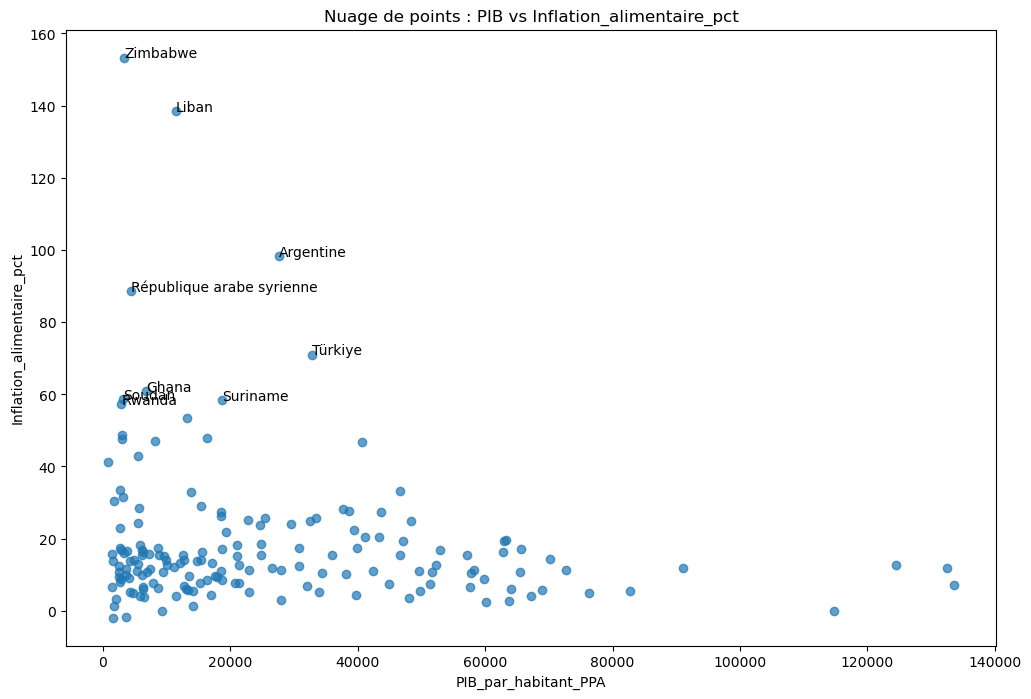

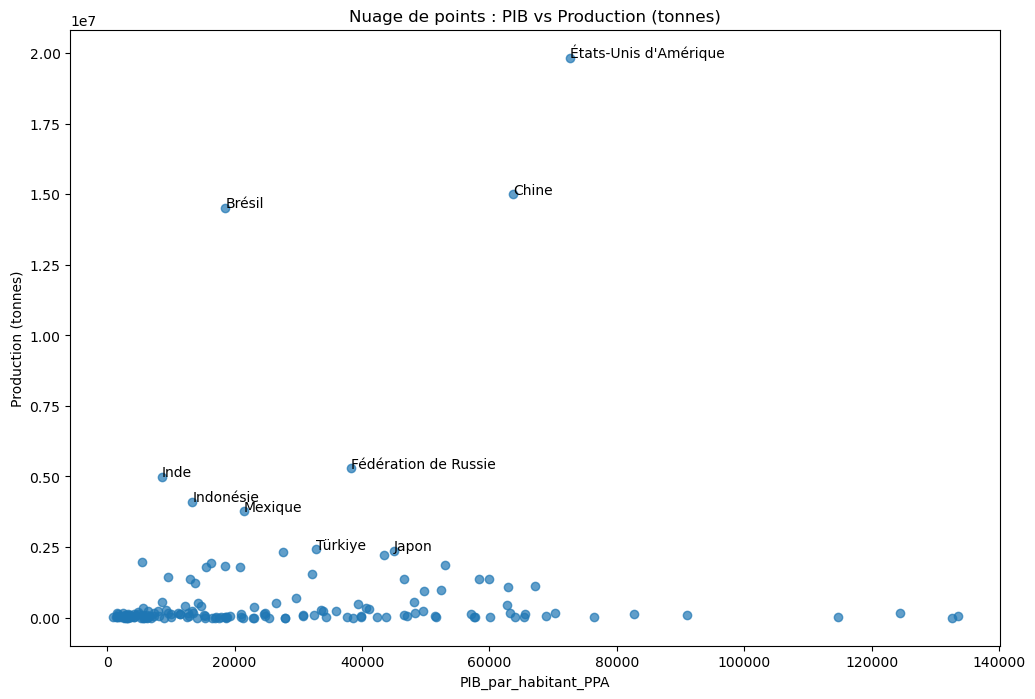

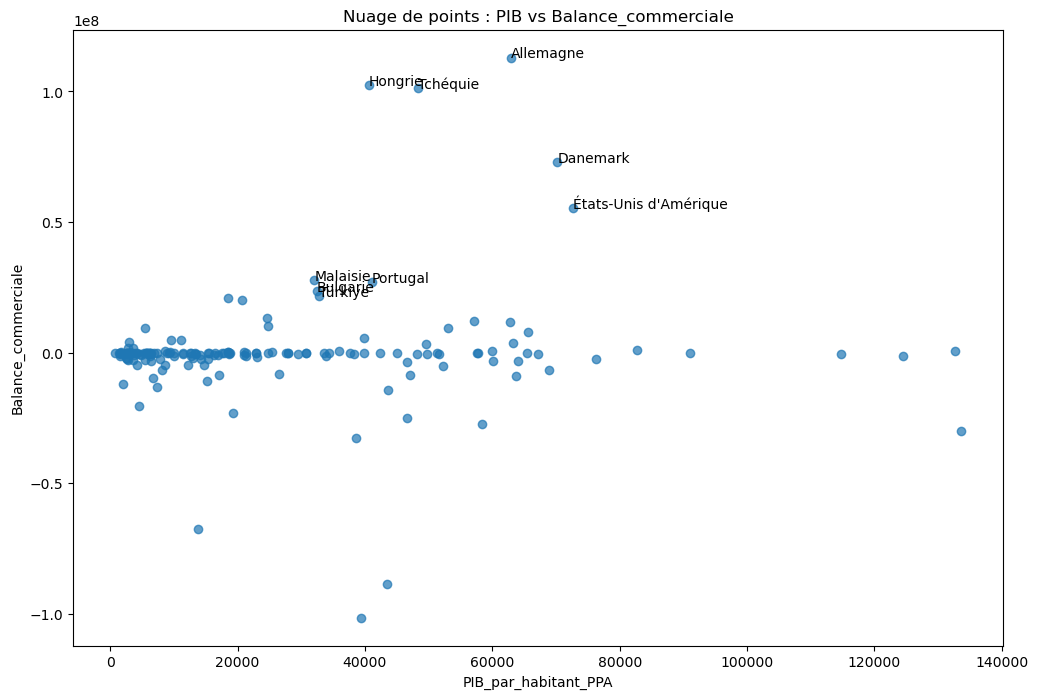

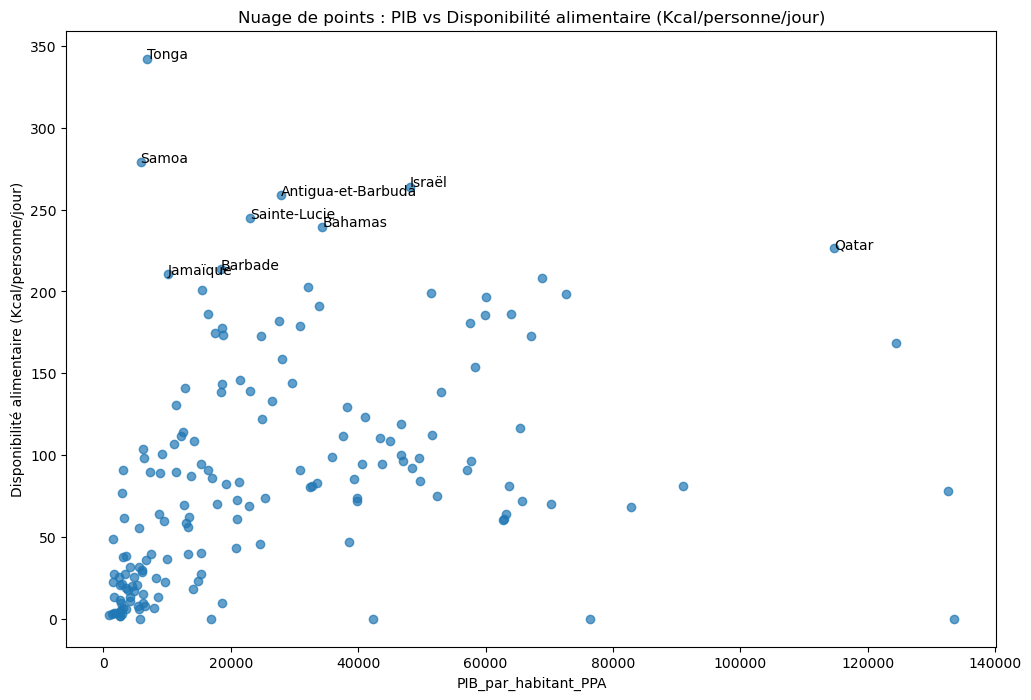

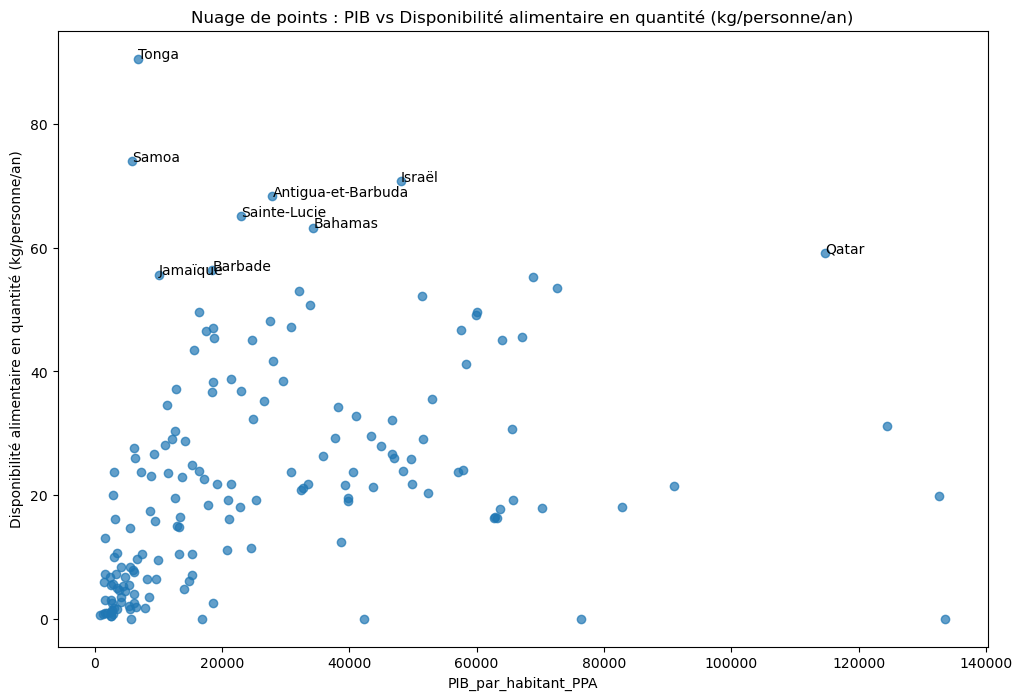

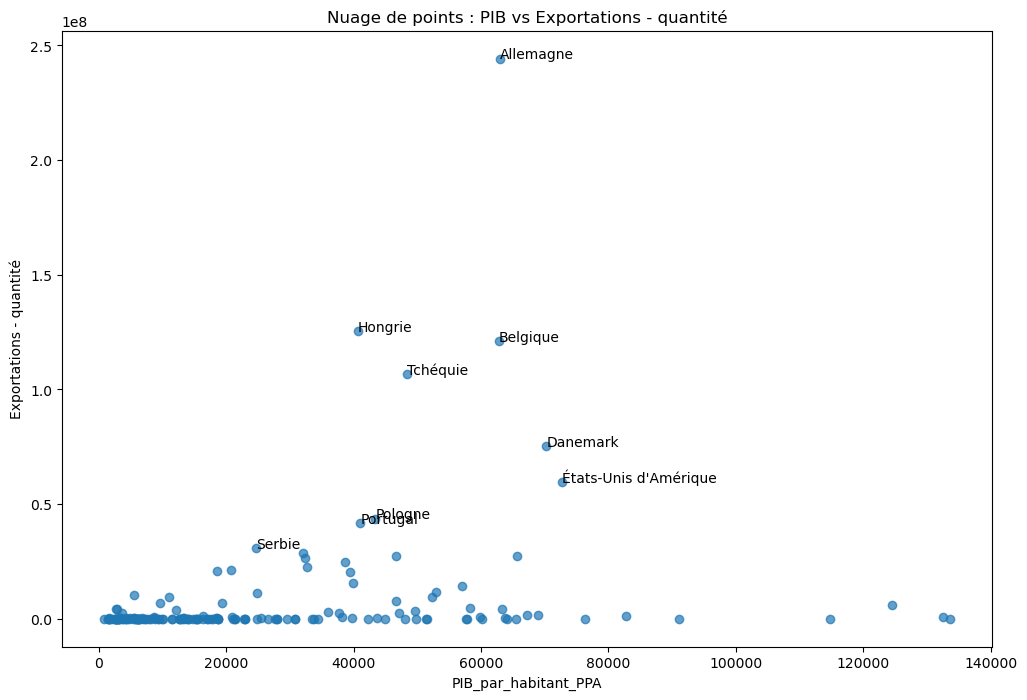

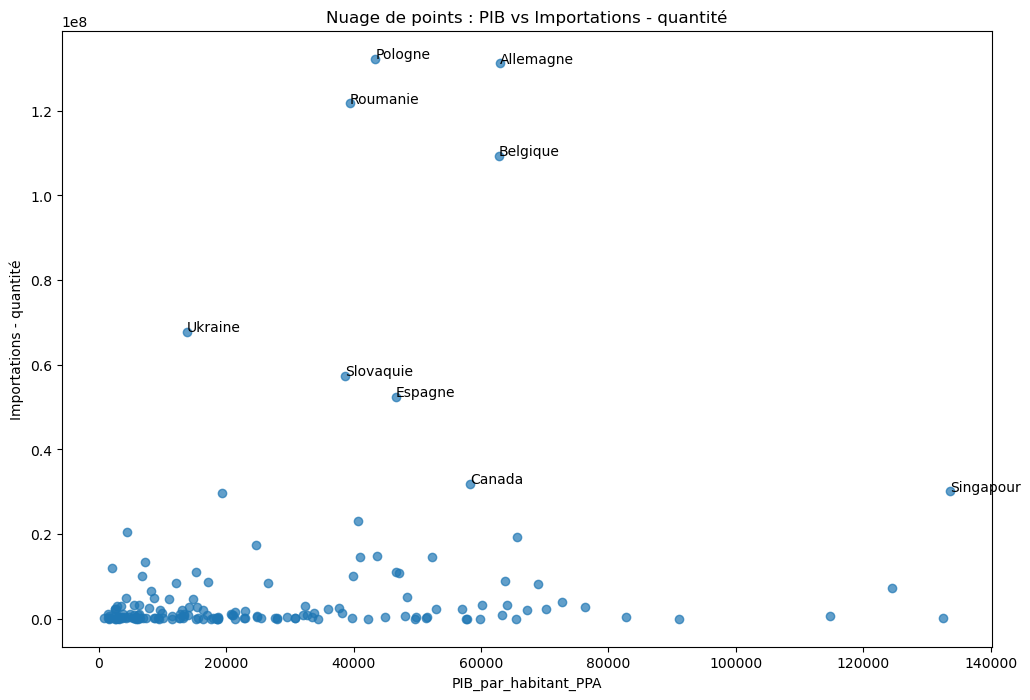

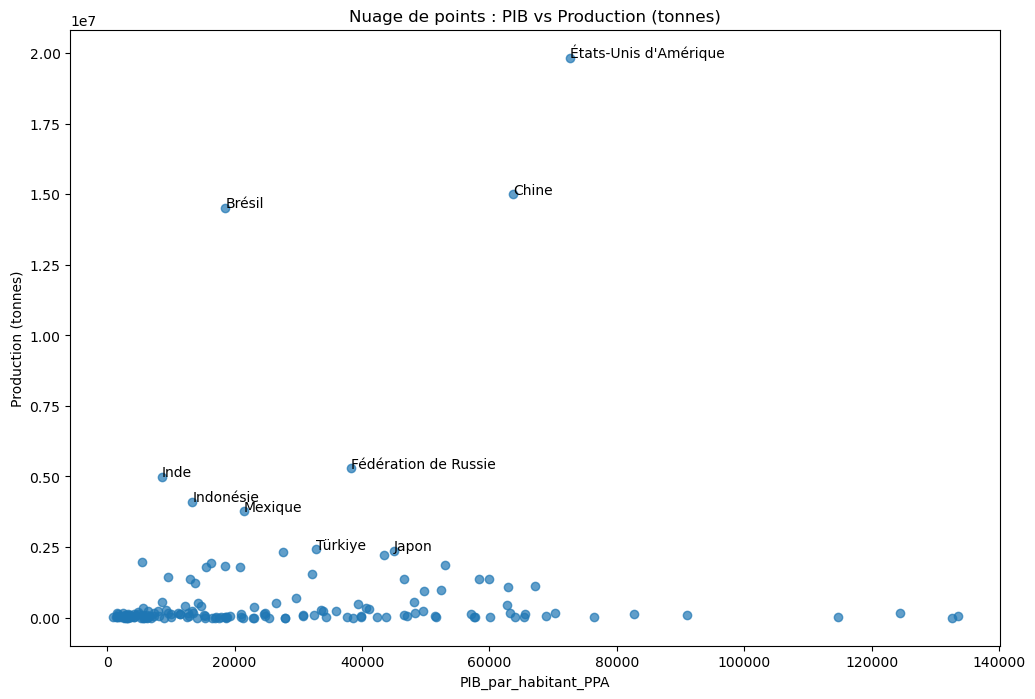

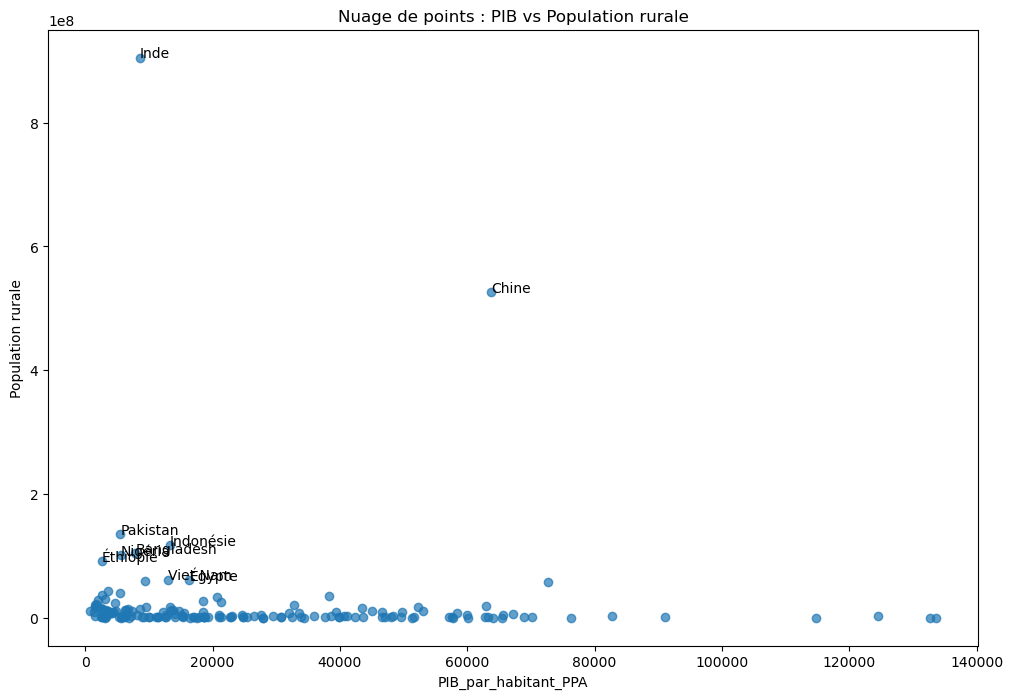

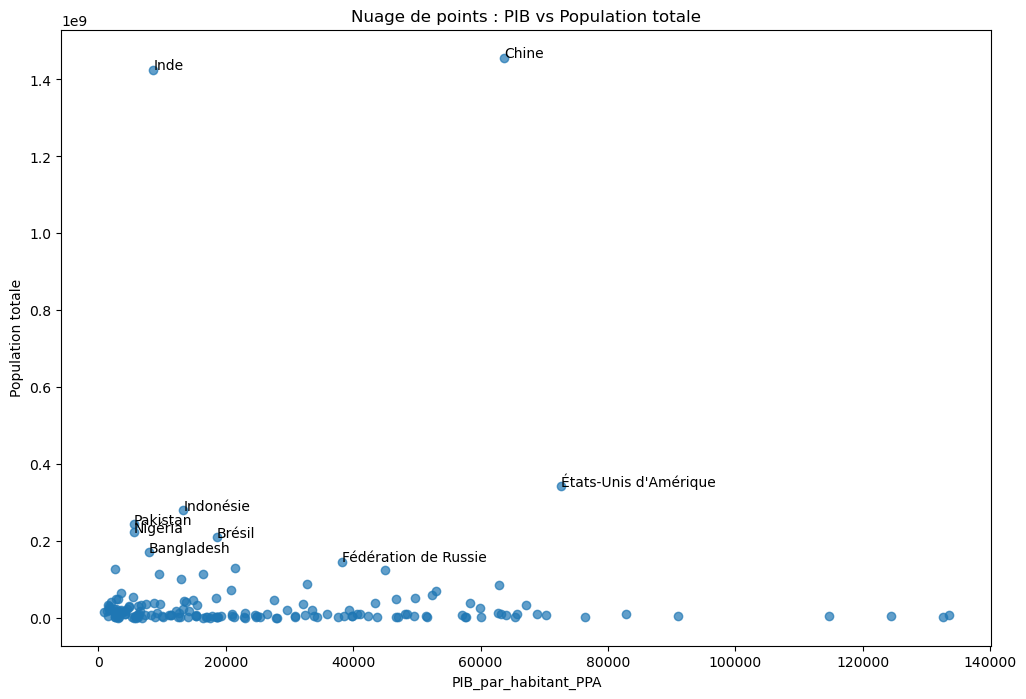

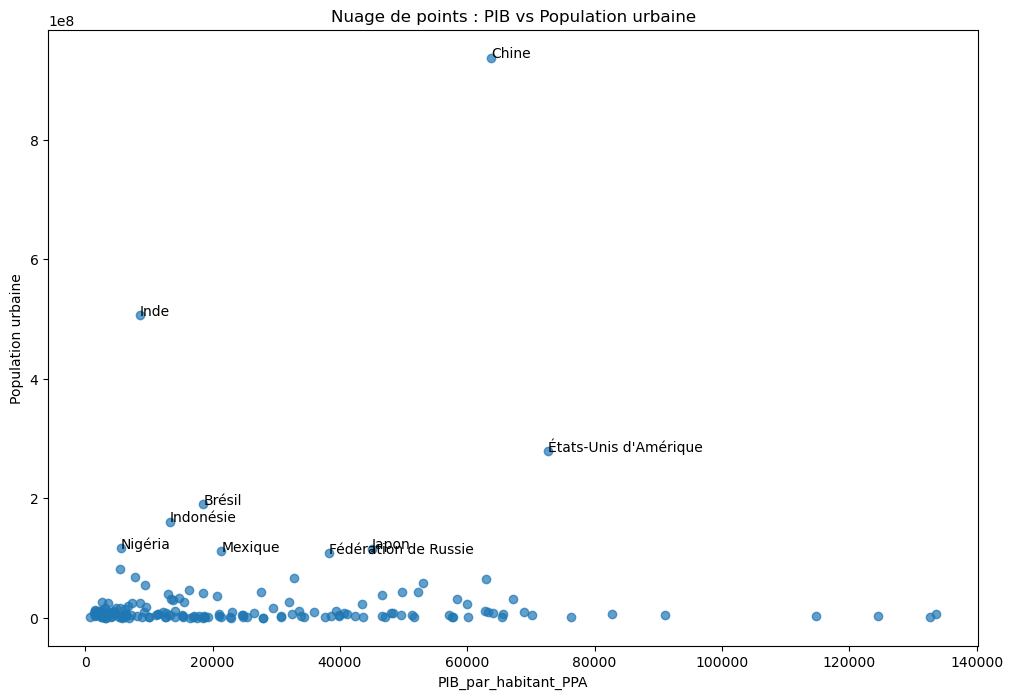

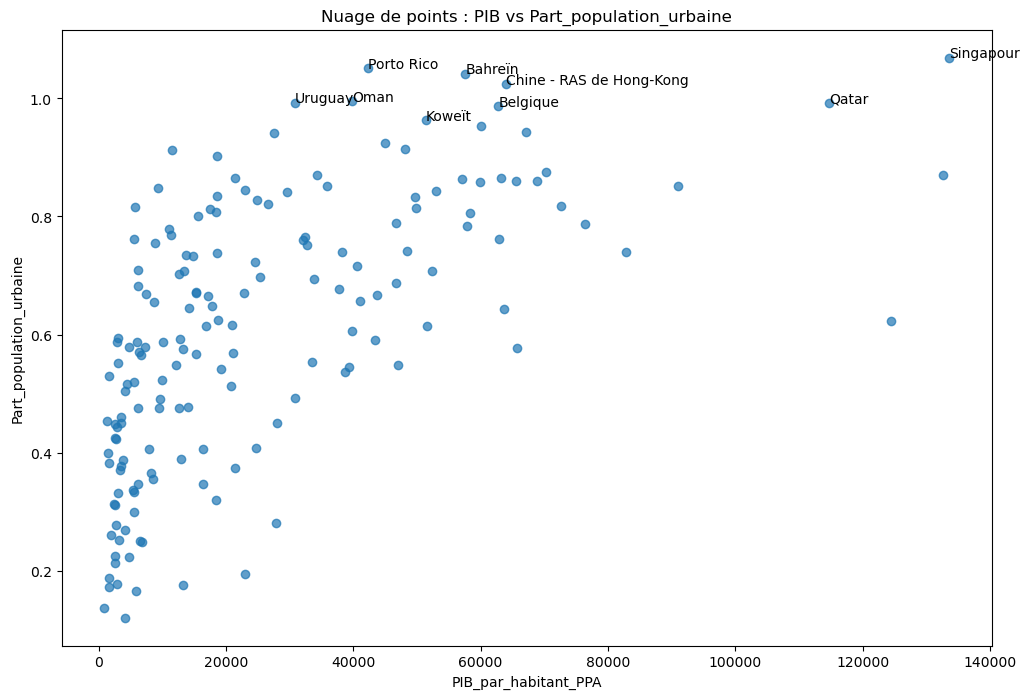

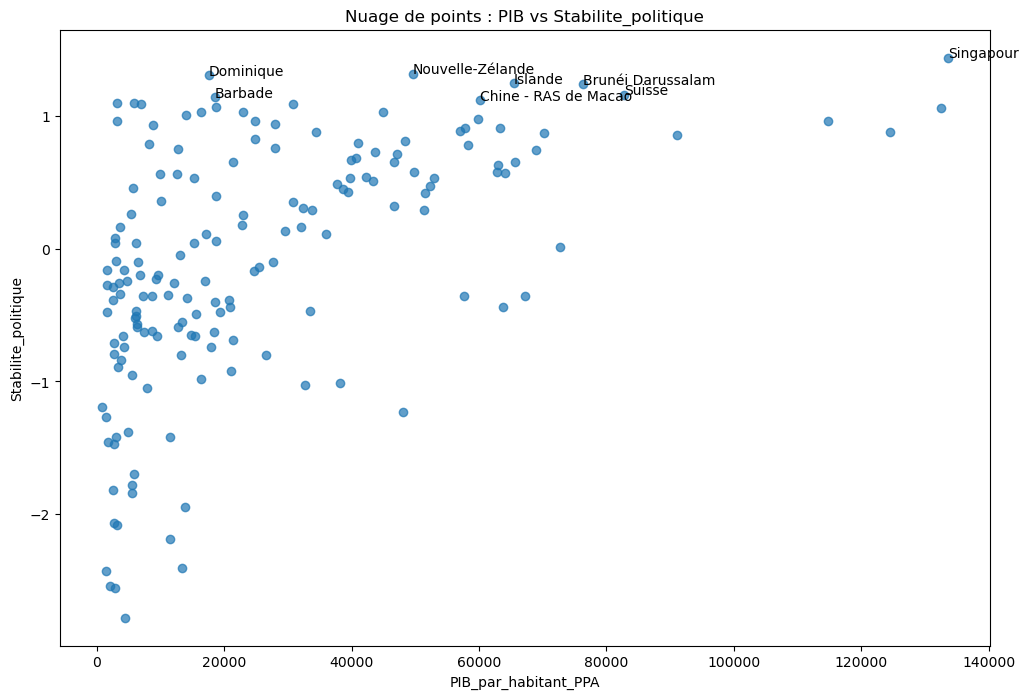

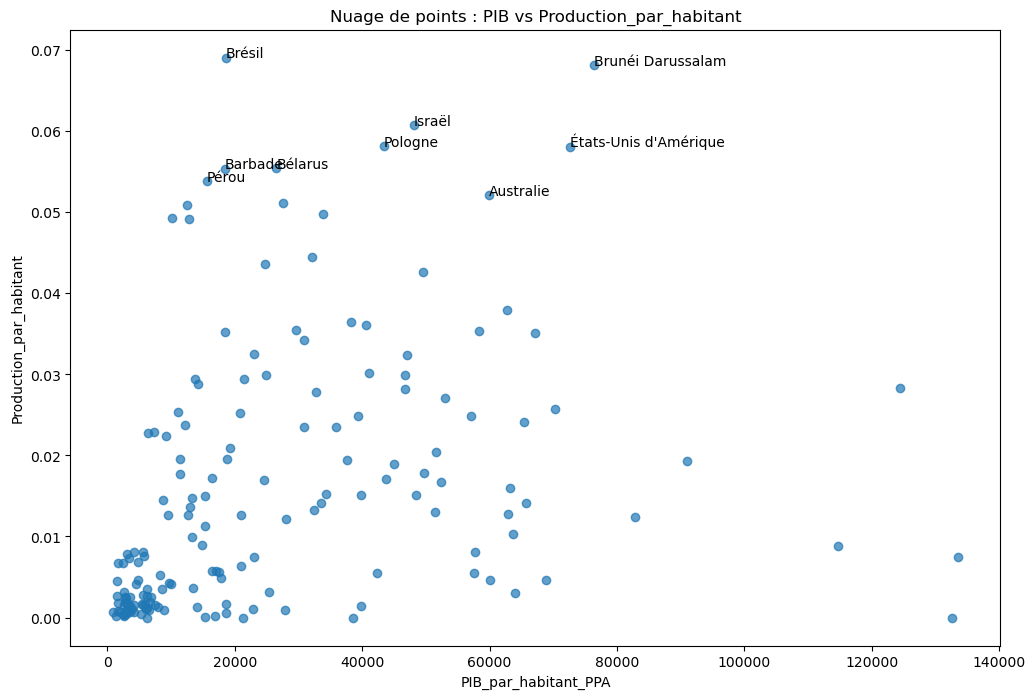

In [515]:
%matplotlib inline
vars_to_compare = [
    "Inflation_alimentaire_pct",
    "Production (tonnes)",
    "Balance_commerciale",
    "Disponibilité alimentaire (Kcal/personne/jour)",
    "Disponibilité alimentaire en quantité (kg/personne/an)",
    "Exportations - quantité",
    "Importations - quantité",
    "Production (tonnes)",
    "Population rurale",
    "Population totale",
    "Population urbaine",
    "Part_population_urbaine",
    "Stabilite_politique",
    "Production_par_habitant"
]

for col in vars_to_compare:
    plt.figure(figsize=(12,8))  # largeur 12, hauteur 8
    plt.scatter(df_acp_ready["PIB_par_habitant_PPA"], df_acp_ready[col], alpha=0.7)
    
    for i, txt in enumerate(df_acp_ready["Zone"]):
        if df_acp_ready[col].iloc[i] > df_acp_ready[col].quantile(0.95):
            plt.annotate(txt, (df_acp_ready["PIB_par_habitant_PPA"].iloc[i], df_acp_ready[col].iloc[i]))

    plt.xlabel("PIB_par_habitant_PPA")
    plt.ylabel(col)
    plt.title(f"Nuage de points : PIB vs {col}")
    plt.show()


In [517]:
#Identifier les pays avec une stabilité politique inférieure à -2
pays_instables = df_acp_ready[df_acp_ready["Stabilite_politique"] < -2]["Zone"]
print(pays_instables.unique())


['Afghanistan' 'Iraq' 'Libye' 'Mali' 'République arabe syrienne' 'Somalie'
 'Soudan' 'Éthiopie']


In [519]:
# Supprimer les pays avec stabilité politique < -2
df_acp_ready = df_acp_ready[df_acp_ready["Stabilite_politique"] >= -2]

In [521]:
# Liste des pays insulaires en voie de développement
pid_list = [
     #Caraïbes
    "Haïti", "Jamaïque", "République dominicaine", "Saint-Kitts-et-Nevis",
    "Antigua-et-Barbuda", "Sainte-Lucie", "Saint-Vincent-et-les-Grenadines",
   "Grenade", "Bahamas", "Barbade",
    # Océan Pacifique
    "Fidji", "Samoa", "Tonga", "Vanuatu", "Papouasie-Nouvelle-Guinée",
    "Îles Salomon", "Kiribati", "Tuvalu", "Nauru", "Marshall",
     #Océan Indien
    "Madagascar", "Comores", "Seychelles", "Maurice"
]

# Supprimer les lignes correspondant à ces pays
df_acp_ready = df_acp_ready[~df_acp_ready["Zone"].isin(pid_list)]

In [523]:
#Ecarter certains pays 
#df_acp_ready = df_acp_ready.loc[~df_acp_ready["Zone"].isin(["Inde", "Chine"])]

In [525]:
# Vérif couverture
n_countries = df_acp_ready['Zone'].nunique()
pop_covered = df_acp_ready['Population totale'].sum()
world_pop_approx = 8_000_000_000
pct_world = pop_covered / world_pop_approx * 100

print(f"Pays présents: {n_countries} ; population couverte ≈ {pop_covered:,.0f} ({pct_world:.1f}% monde)")

Pays présents: 142 ; population couverte ≈ 7,083,648,841 (88.5% monde)


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.6 - Extraction</h3>
</div>

In [528]:
df_acp_ready.to_csv("df_acp_ready.csv", index=False, encoding="utf-8")

In [530]:
# Affiche les 5 premières lignes du DataFrame complet
df_acp_ready.head()

,Zone,Année,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Exportations - quantité,Importations - quantité,Production (tonnes),Population rurale,Population totale,Population urbaine,Inflation_alimentaire_pct,PIB_par_habitant_PPA,Stabilite_politique,Balance_commerciale,Production_par_habitant,Part_population_urbaine
2,Albanie,2022,85.67,22.56,0.0,8743000.0,16335.57,1066667.0,2827608.0,1879873.0,13.338409,17112.0,0.11,-8743000.0,0.005777,0.664828
3,Algérie,2022,23.14,6.13,0.0,4619000.0,407744.31,11247753.0,45477389.0,33336714.0,13.728511,14782.2,-0.65,-4619000.0,0.008966,0.733039
4,Allemagne,2022,60.85,16.51,244187000.0,131195000.0,1076000.00,18460833.0,84086227.0,64130933.0,19.248826,62932.0,0.63,112992000.0,0.012796,0.762681
5,Angola,2022,39.62,10.52,1000.0,35000.0,57177.38,11168041.0,35635029.0,23820261.0,11.525055,7397.5,-0.63,-34000.0,0.001605,0.668451
7,Arabie saoudite,2022,172.57,45.57,1529000.0,1924000.0,1130000.00,5466277.0,32175352.0,30329753.0,4.235354,67178.6,-0.36,-395000.0,0.035120,0.942639


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.7 - Analyse des données</h3>
</div>

In [533]:
# Recalcul propre
df_acp_ready.loc[:, "Part_population_urbaine"] = (
    df_acp_ready["Population urbaine"] / df_acp_ready["Population totale"]
)
df_acp_ready.loc[:, "Part_population_urbaine"] = df_acp_ready["Part_population_urbaine"].clip(0, 1)



In [535]:
cols_to_check = [
    "Disponibilité alimentaire (Kcal/personne/jour)",
    "PIB_par_habitant_PPA",
    "Part_population_urbaine"
]

for col in cols_to_check:
    print(f"\nTop 10 pays pour {col} :")
    print(df_acp_ready[['Zone', col]].sort_values(by=col, ascending=False).head(10))




Top 10 pays pour Disponibilité alimentaire (Kcal/personne/jour) :
                         Zone  Disponibilité alimentaire (Kcal/personne/jour)
79                     Israël                                          263.98
137                     Qatar                                          226.29
191       Émirats arabes unis                                          208.40
98                   Malaisie                                          202.57
136                     Pérou                                          200.72
88                     Koweït                                          199.06
194     États-Unis d'Amérique                                          198.23
37       Chine - RAS de Macao                                          196.81
127                    Panama                                          191.16
36   Chine - RAS de Hong-Kong                                          185.97

Top 10 pays pour PIB_par_habitant_PPA :
                      Zone  PIB_pa

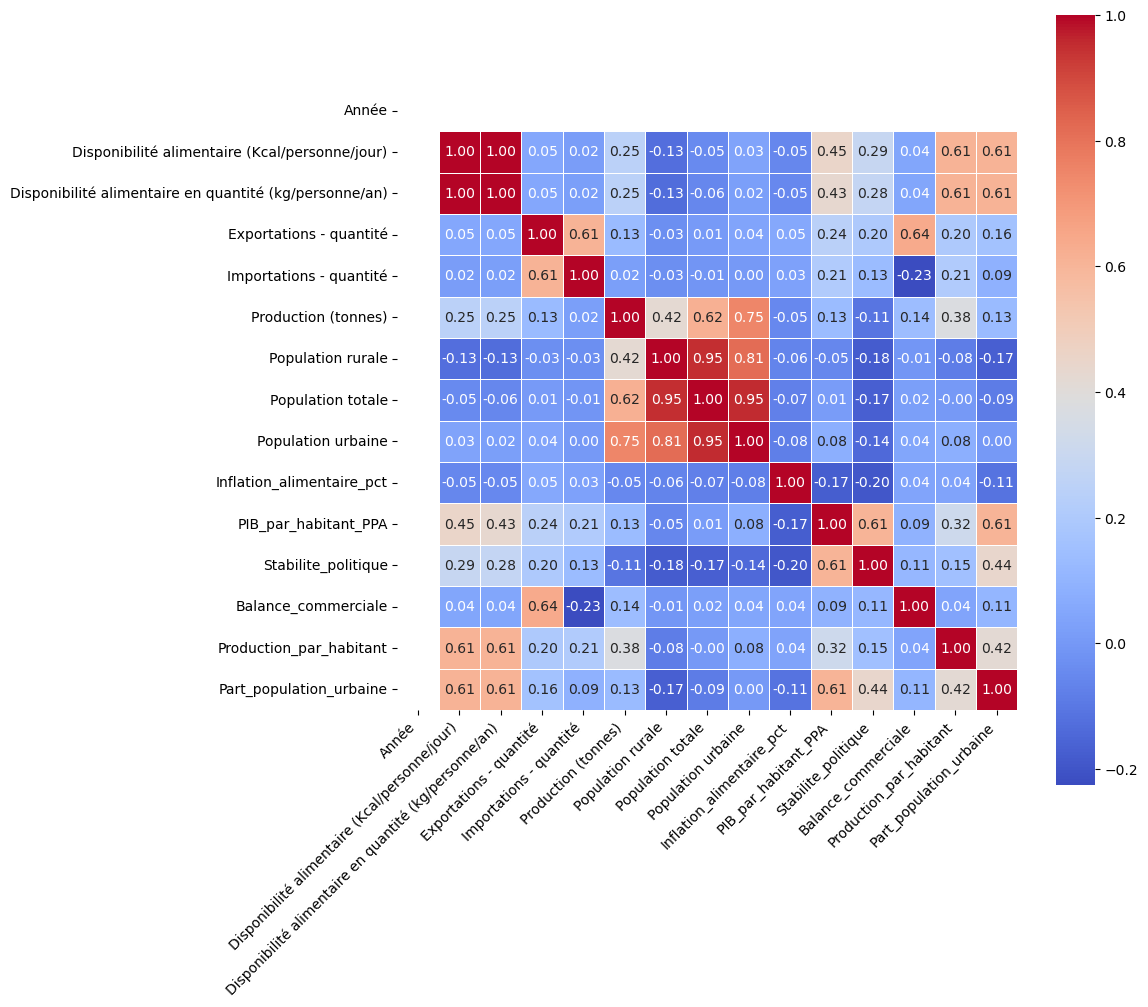

In [537]:
# df_acp_ready heatmap de corrélation
numeric_cols = df_acp_ready.select_dtypes(include=np.number)
mat_corr = numeric_cols.corr()

# Plot carré
plt.figure(figsize=(10, 10))  # largeur = hauteur pour garder des carrés
sns.heatmap(mat_corr, 
            annot=True,        # affiche les valeurs
            fmt=".2f",         # format des nombres
            cmap="coolwarm",   # palette de couleurs
            square=True,       # fait des carrés parfaits
            cbar=True,         # afficher la barre de couleur
            linewidths=0.5)    # ligne de séparation entre carrés
plt.xticks(rotation=45, ha='right')  # rotation labels x
plt.yticks(rotation=0)               # labels y horizontaux
plt.show()
